In [1]:
import numpy as np

class CustomGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.parameters.append([(np.mean(X_c, axis=0), np.var(X_c, axis=0))])
            self.priors = [X[y == c].shape[0] / len(y) for c in self.classes]

    def _calculate_likelihood(self, mean, var, x):
        eps = 1e-4
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-(x - mean)**2 / (2 * var + eps))
        return coeff * exponent

    def predict(self, X):
        y_pred = [self._predict_single(x) for x in X]
        return np.array(y_pred)

    def _predict_single(self, x):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self.priors[i])
            mean, var = self.parameters[i][0]
            likelihood = np.sum(np.log(self._calculate_likelihood(mean, var, x)))
            posteriors.append(prior + likelihood)
        return self.classes[np.argmax(posteriors)]

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Initialize and train
nb = CustomGaussianNB()
nb.fit(X, y)
predictions = nb.predict(X)

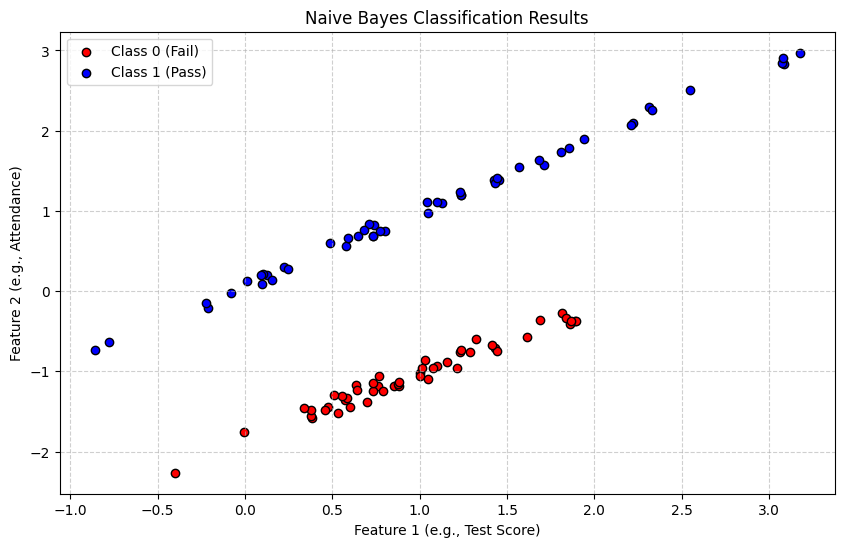

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0 (Fail)', edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1 (Pass)', edgecolors='k')

plt.title("Naive Bayes Classification Results")
plt.xlabel("Feature 1 (e.g., Test Score)")
plt.ylabel("Feature 2 (e.g., Attendance)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()